# **Data Analysis for Classification**

#### Project Explaination 🦺

The goal is to predict passenger satisfaction and use the insights to improve key business metrics such as customer retention, revenue per flight, and operational efficiency. By understanding what drives satisfaction, airlines can target specific areas for improvement and personalize the passenger experience.

This dataset can lead to 2 business use cases

- <mark>Real-Time In-flight Experience Improvement:

    ***Objective:***

    Use real-time data to improve the in-flight experience based on passenger satisfaction predictions.

    ***How It Works:*** 
    
    Use predictive models to adjust in-flight services dynamically. 
    
    ***For example:***

    If a flight is predicted to have a high chance of dissatisfaction (e.g., due to a long flight or past delays), increase the availability of onboard services such as free snacks, upgraded entertainment, or complimentary beverages.
    Engage passengers through personalized messages, improving interaction and making passengers feel valued.

    ***Impact:***
    
    Improves real-time satisfaction, reduces the likelihood of negative reviews, and creates a positive in-flight experience.

- <mark>Personalized Customer Service and Targeted Promotions:

    ***Objective:***

    Use satisfaction prediction models to anticipate customer needs and provide personalized services during the booking process and in-flight.

    ***How It Works:*** 

    Use the prediction model to identify passengers who are likely to be unsatisfied based on past experiences, preferences, or demographic factors. Offer personalized services such as:

    - Upgrades to higher flight classes.
    - Special seat preferences or in-flight services (e.g., meals, entertainment).
    - Early boarding or fast check-in processes.

    ***Impact:*** 
    
    Increases customer satisfaction and loyalty, leading to repeat business and higher lifetime value.

### -------------------------------------------------------------------------------------------------------------

#### About Dataset 📚

***Context***

US Airline passenger satisfaction survey

***Content***

"Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)"

Age: The actual age of the passengers

Gender: Gender of the passengers (Female, Male)

"Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)"

"Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)"

Customer Type: The customer type (Loyal customer, disloyal customer)

Flight distance: The flight distance of this journey

"Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"

Ease of Online booking: Satisfaction level of online booking

Inflight service Satisfaction level of inflight service

Online boarding: Satisfaction level of online boarding

Inflight entertainment: Satisfaction level of inflight entertainment

Food and drink: Satisfaction level of Food and drink

Seat comfort: Satisfaction level of Seat comfort

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Baggage handling: Satisfaction level of baggage handling

Gate location: Satisfaction level of Gate location

Cleanliness: Satisfaction level of Cleanliness

Check-in service: Satisfaction level of Check-in service

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Flight cancelled: Whether the Flight cancelled or not (Yes, No)

Flight time in minutes: Minutes of Flight takes

***Source***

https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

### -------------------------------------------------------------------------------------------------------------

## 1. **Data Exploration**

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder

In [134]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")
df_combined = pd.concat([df_train, df_test], ignore_index=True)
df_copy = df_combined.copy()
df_copy.head()
print(df_combined.shape)


(129880, 25)


In [135]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [136]:
df_copy.describe().T

count          mean           std   min  \
Unnamed: 0                         129880.0  44158.700000  31207.377062   0.0   
id                                 129880.0  64940.500000  37493.270818   1.0   
Age                                129880.0     39.427957     15.119360   7.0   
Flight Distance                    129880.0   1190.316392    997.452477  31.0   
Inflight wifi service              129880.0      2.728696      1.329340   0.0   
Departure/Arrival time convenient  129880.0      3.057599      1.526741   0.0   
Ease of Online booking             129880.0      2.756876      1.401740   0.0   
Gate location                      129880.0      2.976925      1.278520   0.0   
Food and drink                     129880.0      3.204774      1.329933   0.0   
Online boarding                    129880.0      3.252633      1.350719   0.0   
Seat comfort                       129880.0      3.441361      1.319289   0.0   
Inflight entertainment             129880.0      3.358077      1.334049   0.0   
On-board service                   129880.0      3.383023      1.287099   0.0   
Leg room service                   129880.0      3.350878      1.316252   0.0   
Baggage handling                   129880.0      3.632114      1.180025   1.0   
Checkin service                    129880.0      3.306267      1.266185   0.0   
Inflight service                   129880.0      3.642193      1.176669   0.0   
Cleanliness                        129880.0      3.286326      1.313682   0.0   
Departure Delay in Minutes         129880.0     14.713713     38.071126   0.0   
Arrival Delay in Minutes           129487.0     15.091129     38.465650   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         16234.75  38963.5  71433.25  103903.0  
id                                 32470.75  64940.5  97410.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    844.0   1744.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

Check if there is any missing value

In [137]:
df_copy.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Unnamed: 0                             0
Online boarding                        0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Food and drink                         0
id                                     0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Gender                                 0
satisfaction    

Encode target label to be 0 and 1 as a binary classification for visualization

In [138]:
df_copy["satisfaction"] = df_copy['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df_copy

C:\Users\premj\AppData\Local\Temp\ipykernel_26584\3545082657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy["satisfaction"] = df_copy['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})


Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
129875       25971   78463    Male  disloyal Customer   34  Business travel   
129876       25972   71167    Male     Loyal Customer   23  Business travel   
129877       25973   37675  Female     Loyal Customer   17  Personal Travel   
129878       25974   90086    Male     Loyal Customer   14  Business travel   
129879       25975   34799  Female     Loyal Customer   42  Personal Travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
129875  Business              526                      3   
129876  Business              646                      4   
129877       Eco              828                      2   
129878  Business             1127                      3   
129879       Eco              264                      2   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
129875                                  3  ...                       4   
129876                                  4  ...                       4   
129877                                  5  ...                       2   
129878                                  3  ...                       4   
129879                                  5  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

Visualize the frequency of target label (0 = neutral or dissatisfied, 1 = satisfied)

<Axes: xlabel='satisfaction', ylabel='count'>

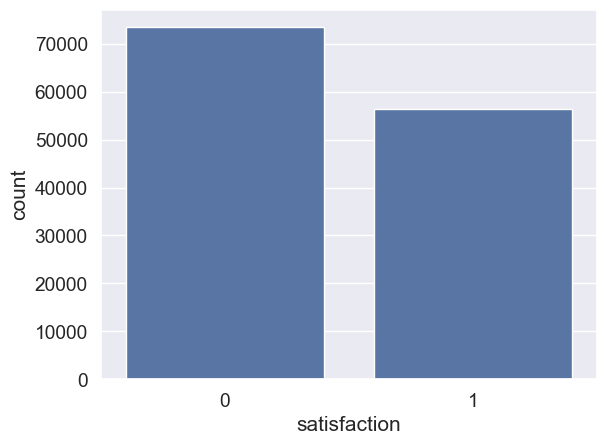

In [139]:
sns.countplot(x="satisfaction", data=df_copy)

Plot histogram for every features to see the frequency

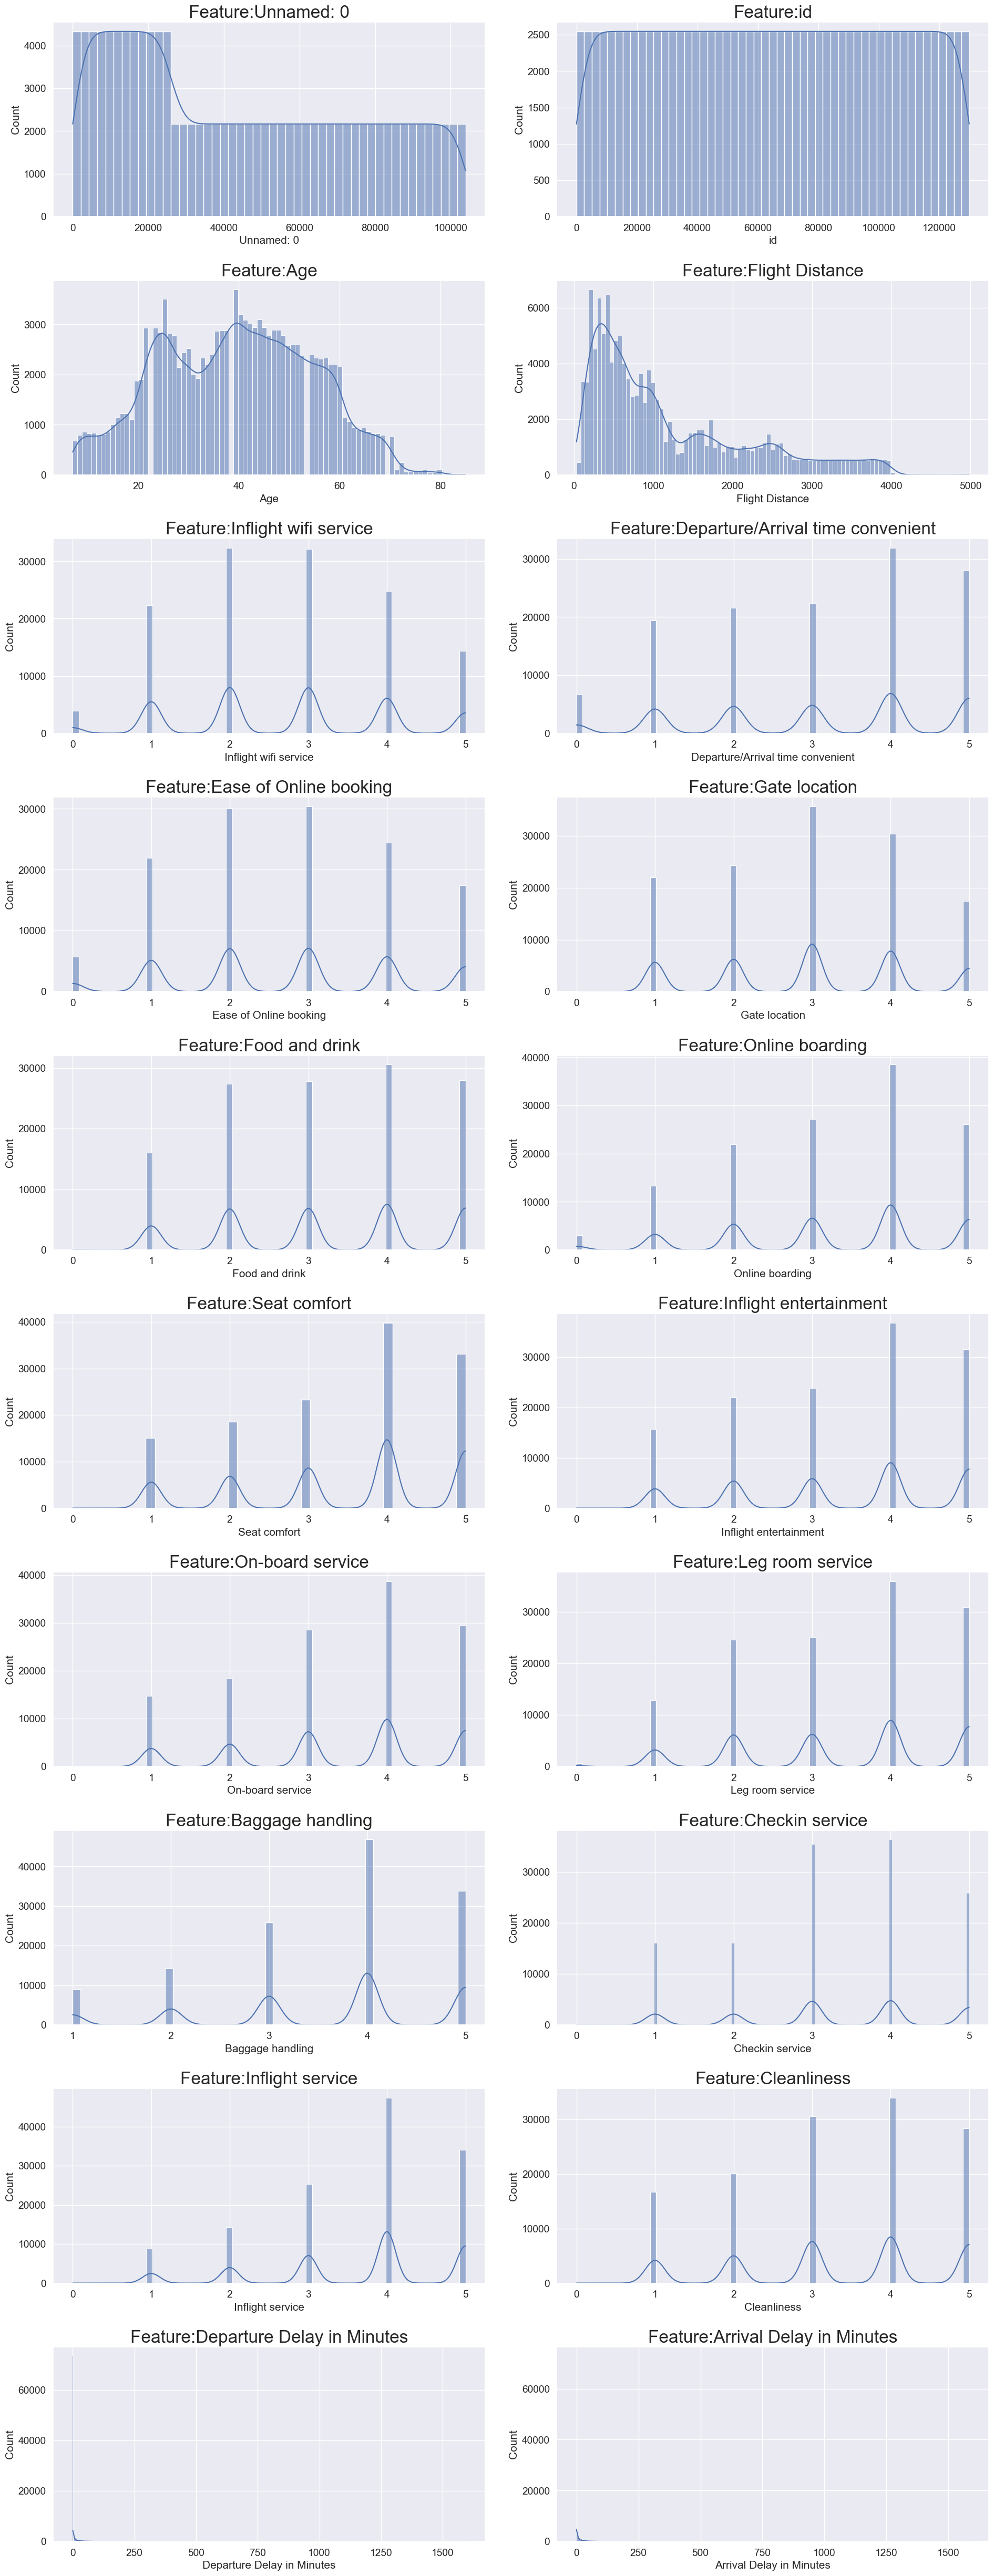

In [140]:
numerics = ['int64', 'float64']

train_con_col = df_copy.select_dtypes(include = numerics).columns
train_cat_col = df_copy.select_dtypes(include = "object").columns

fig, axs = plt.subplots(10, 2, figsize=(20,50))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_con_col, axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df_copy,x=df_copy[f],kde=True)
    ax.set_title('Feature:'+ f)

C:\Users\premj\AppData\Local\Temp\ipykernel_26584\957318549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Arrival Delay in Minutes'])


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

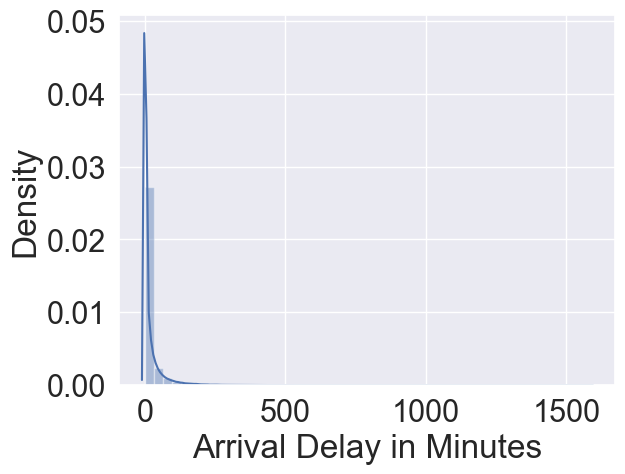

In [141]:
sns.distplot(df_copy['Arrival Delay in Minutes'])

C:\Users\premj\AppData\Local\Temp\ipykernel_26584\834750658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Departure Delay in Minutes'])


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

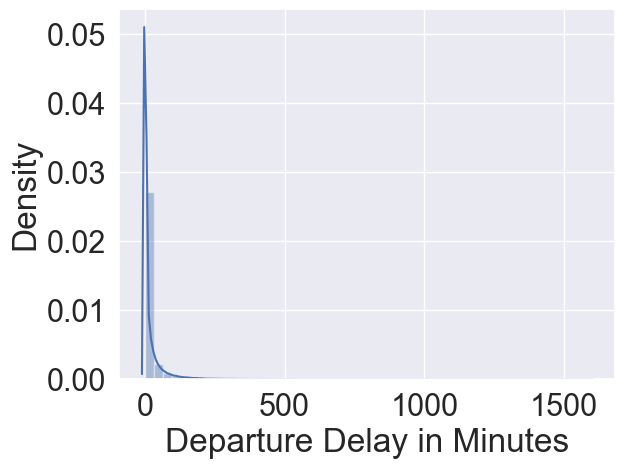

In [142]:
sns.distplot(df_copy['Departure Delay in Minutes'])

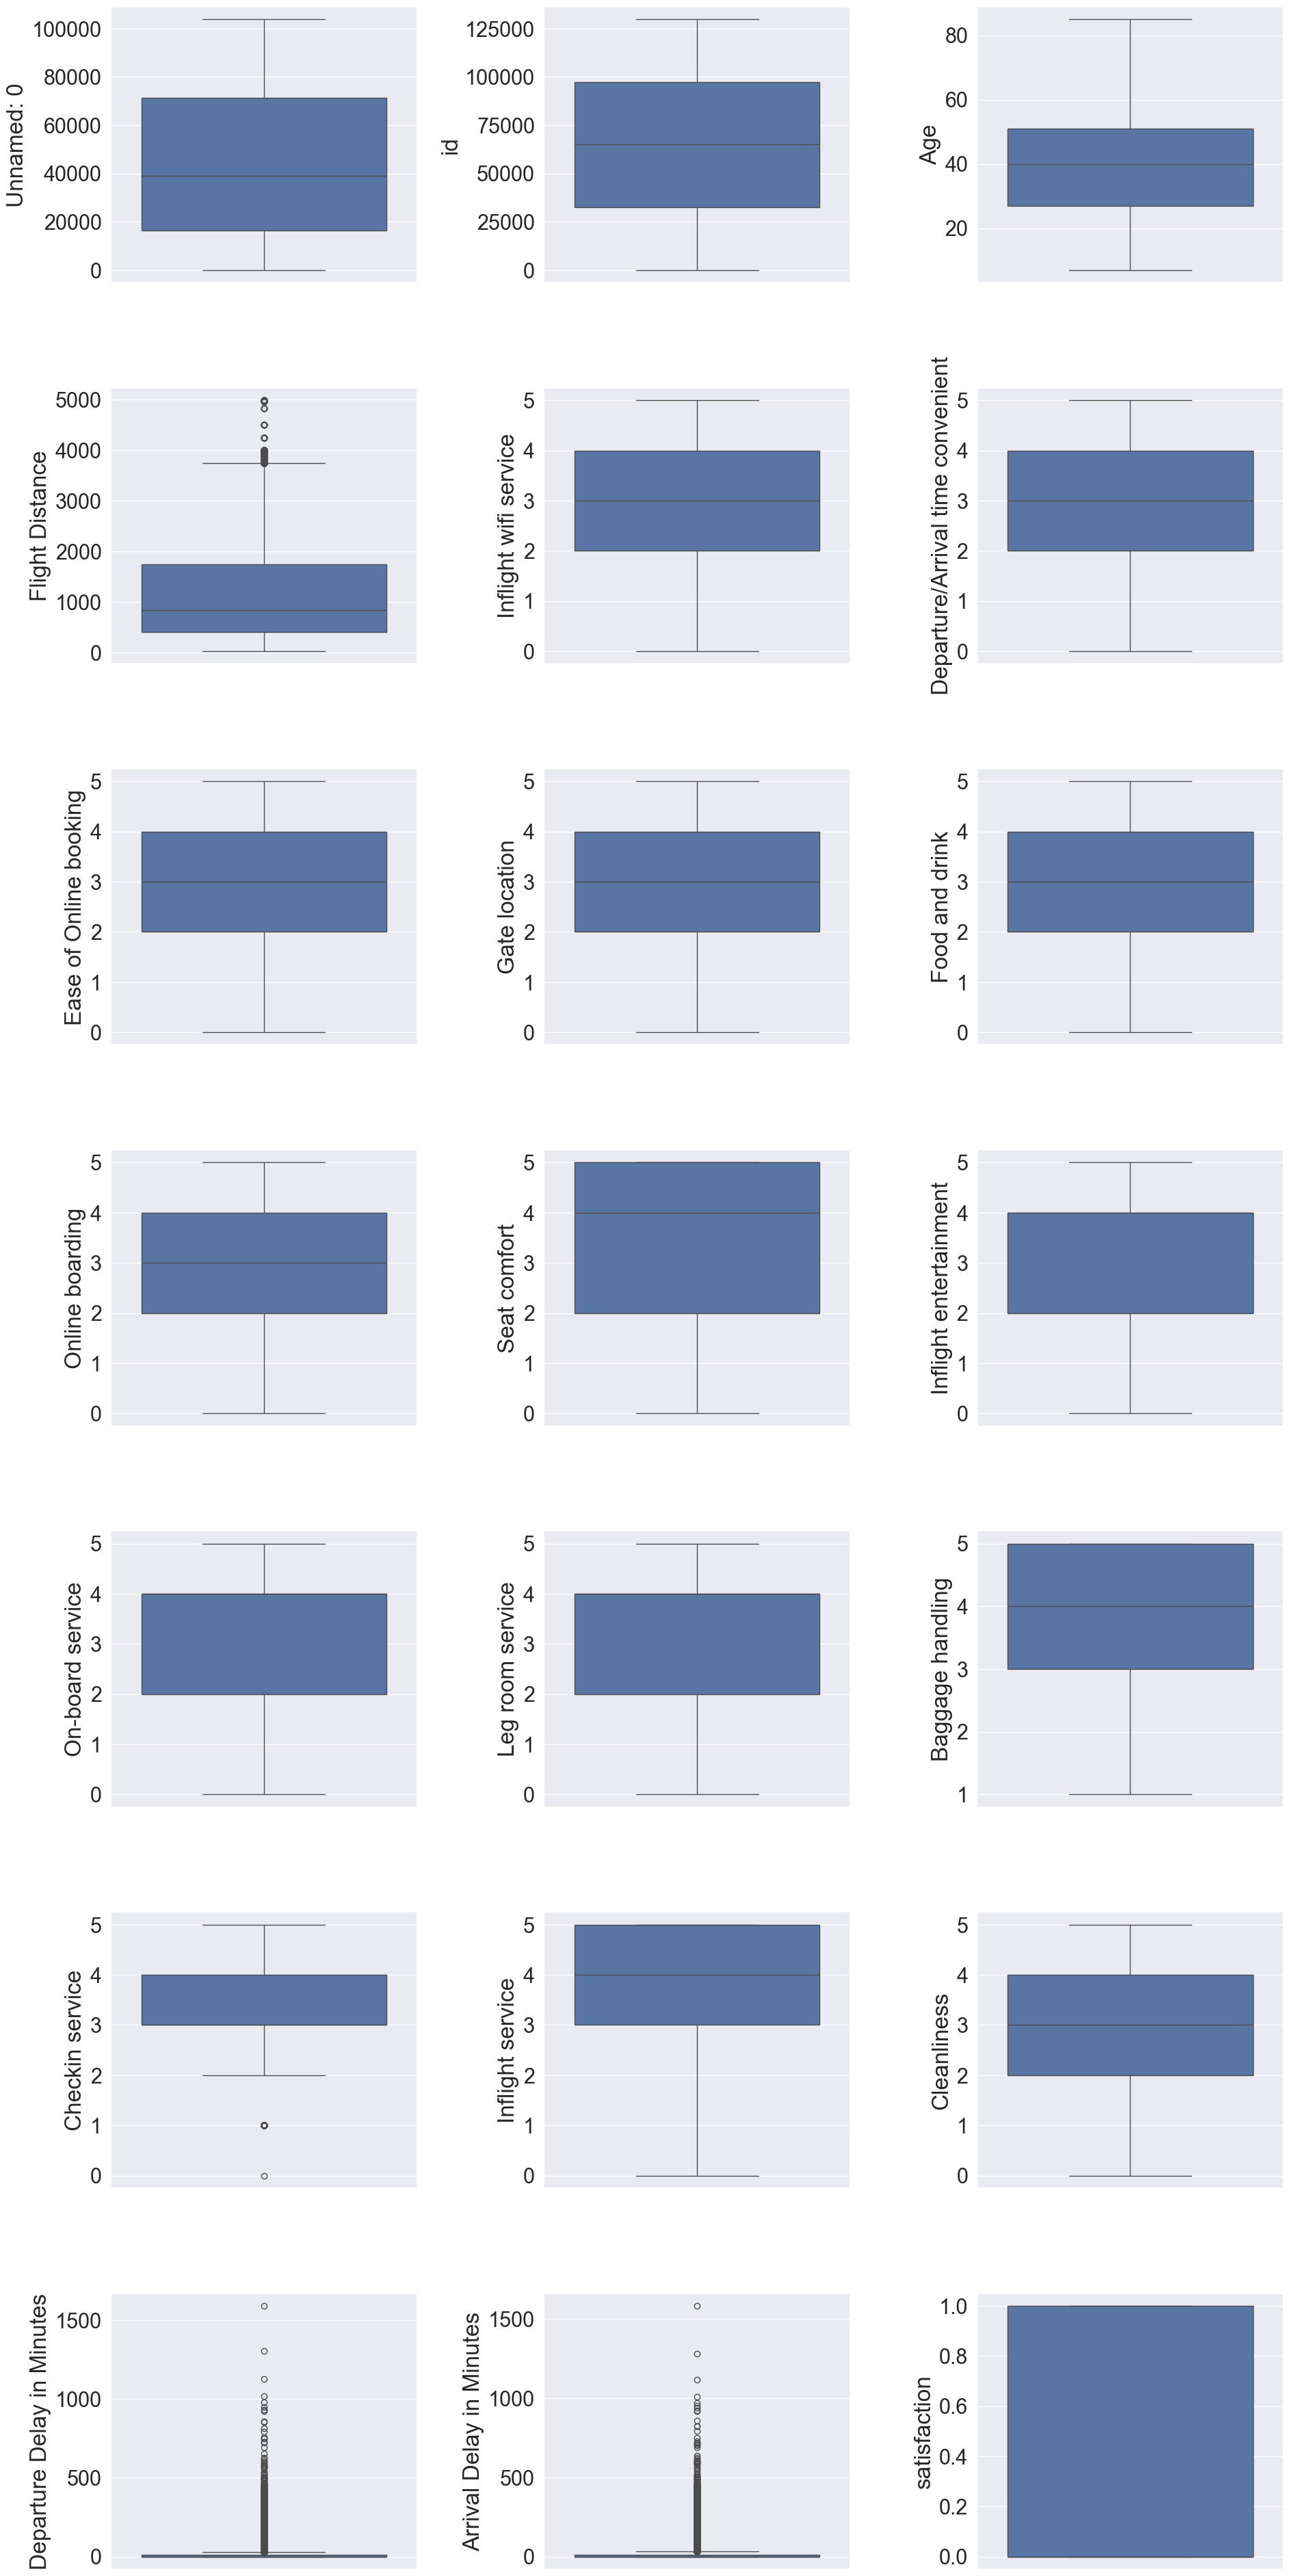

In [143]:
fig, axs = plt.subplots(7, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col, axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_copy,y=df_copy[f])

In [144]:
sns.boxplot(ax=ax,data=df_copy,y=df_copy["Arrival Delay in Minutes"])

<Axes: ylabel='satisfaction'>

It can be seeing that the delay time minutes exists so many outliers.

Generally, passenger satisfy with the baggage handling and inflight service where the score ranges from 3 to 5 while others mainly stay within 2 to 4 scores.

### See category of customers in each topic

In [145]:
def detail_barplot(category):
    fig, axs = plt.subplots(10, 2, figsize=(20, 60))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'muted', data=df_copy)

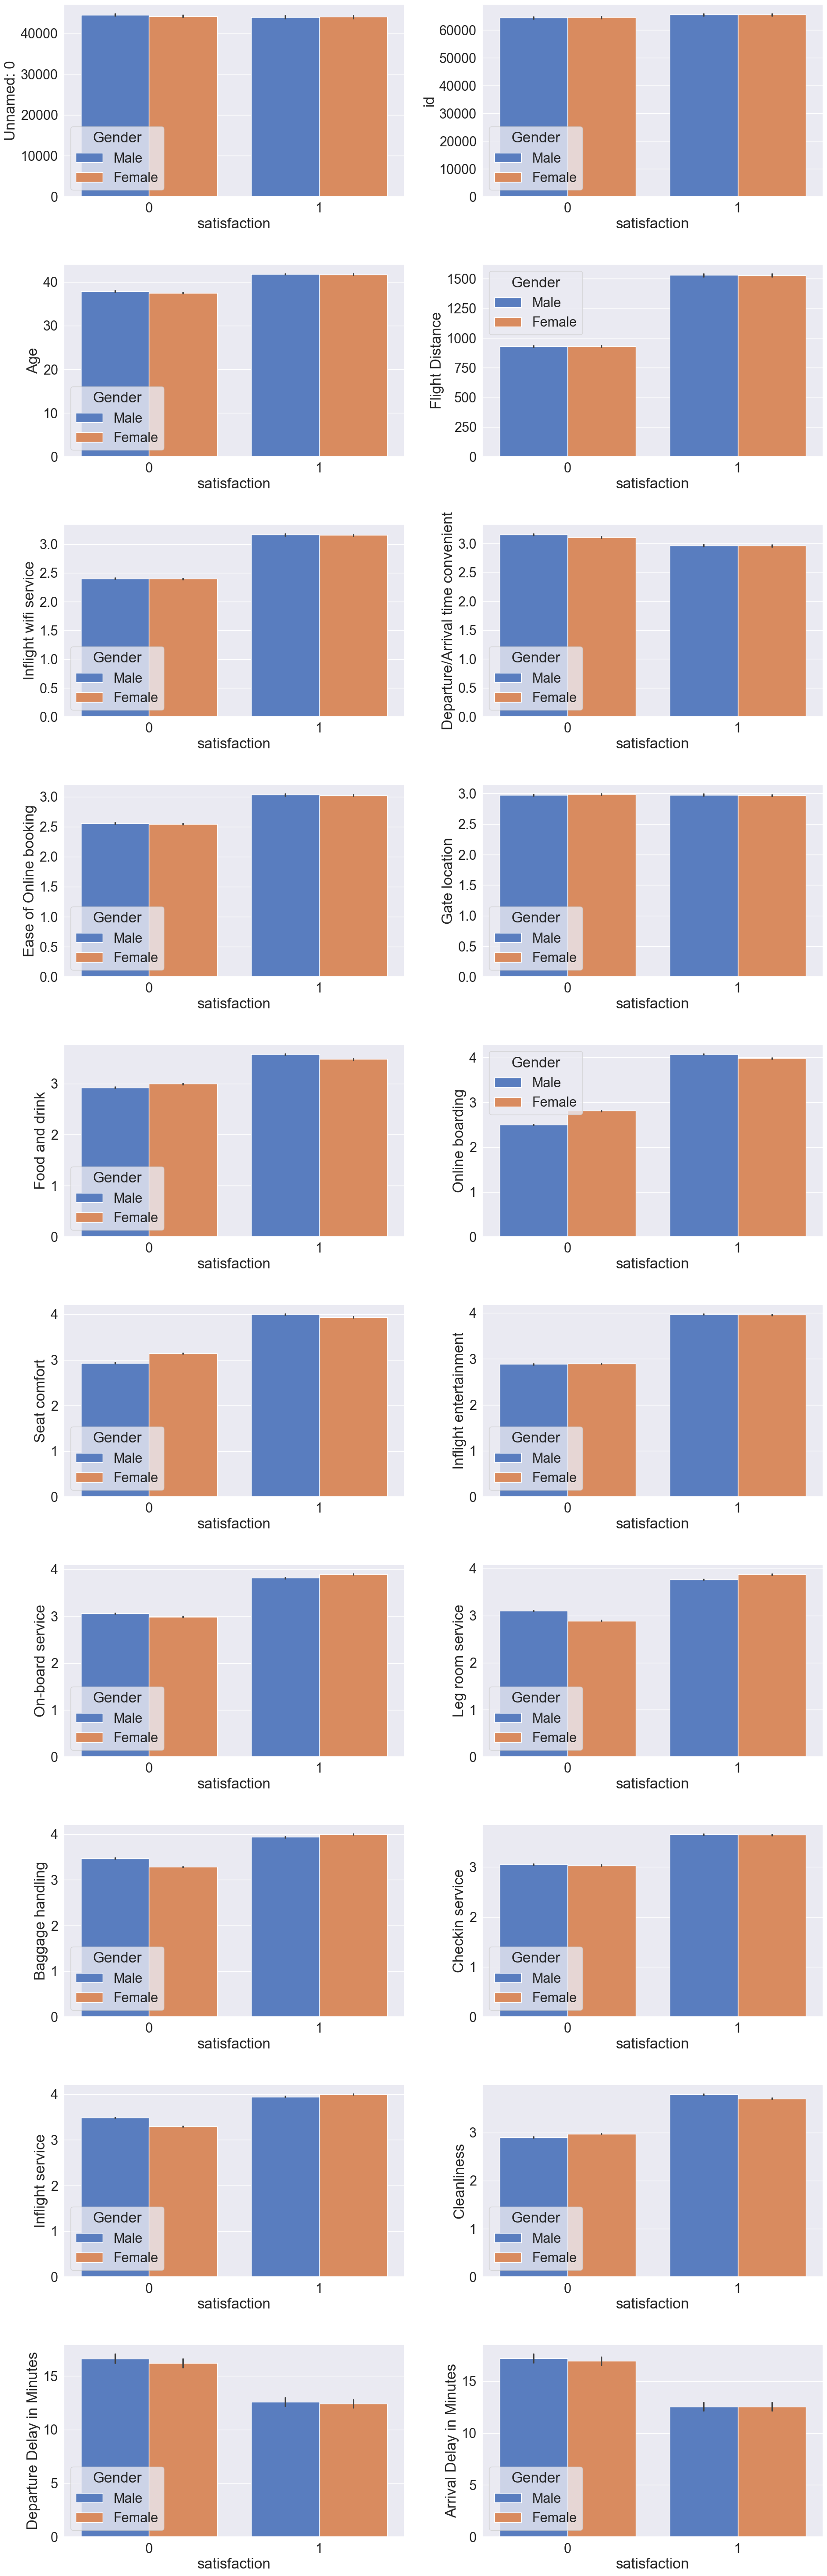

In [146]:
detail_barplot("Gender")

Based on the result for gender,

the long flight distance make them more likely to satisfy the trip.

But in average of delay time, they may not satisfy when time is 13 mins above.

Between the male and female, there are no significant patterns.

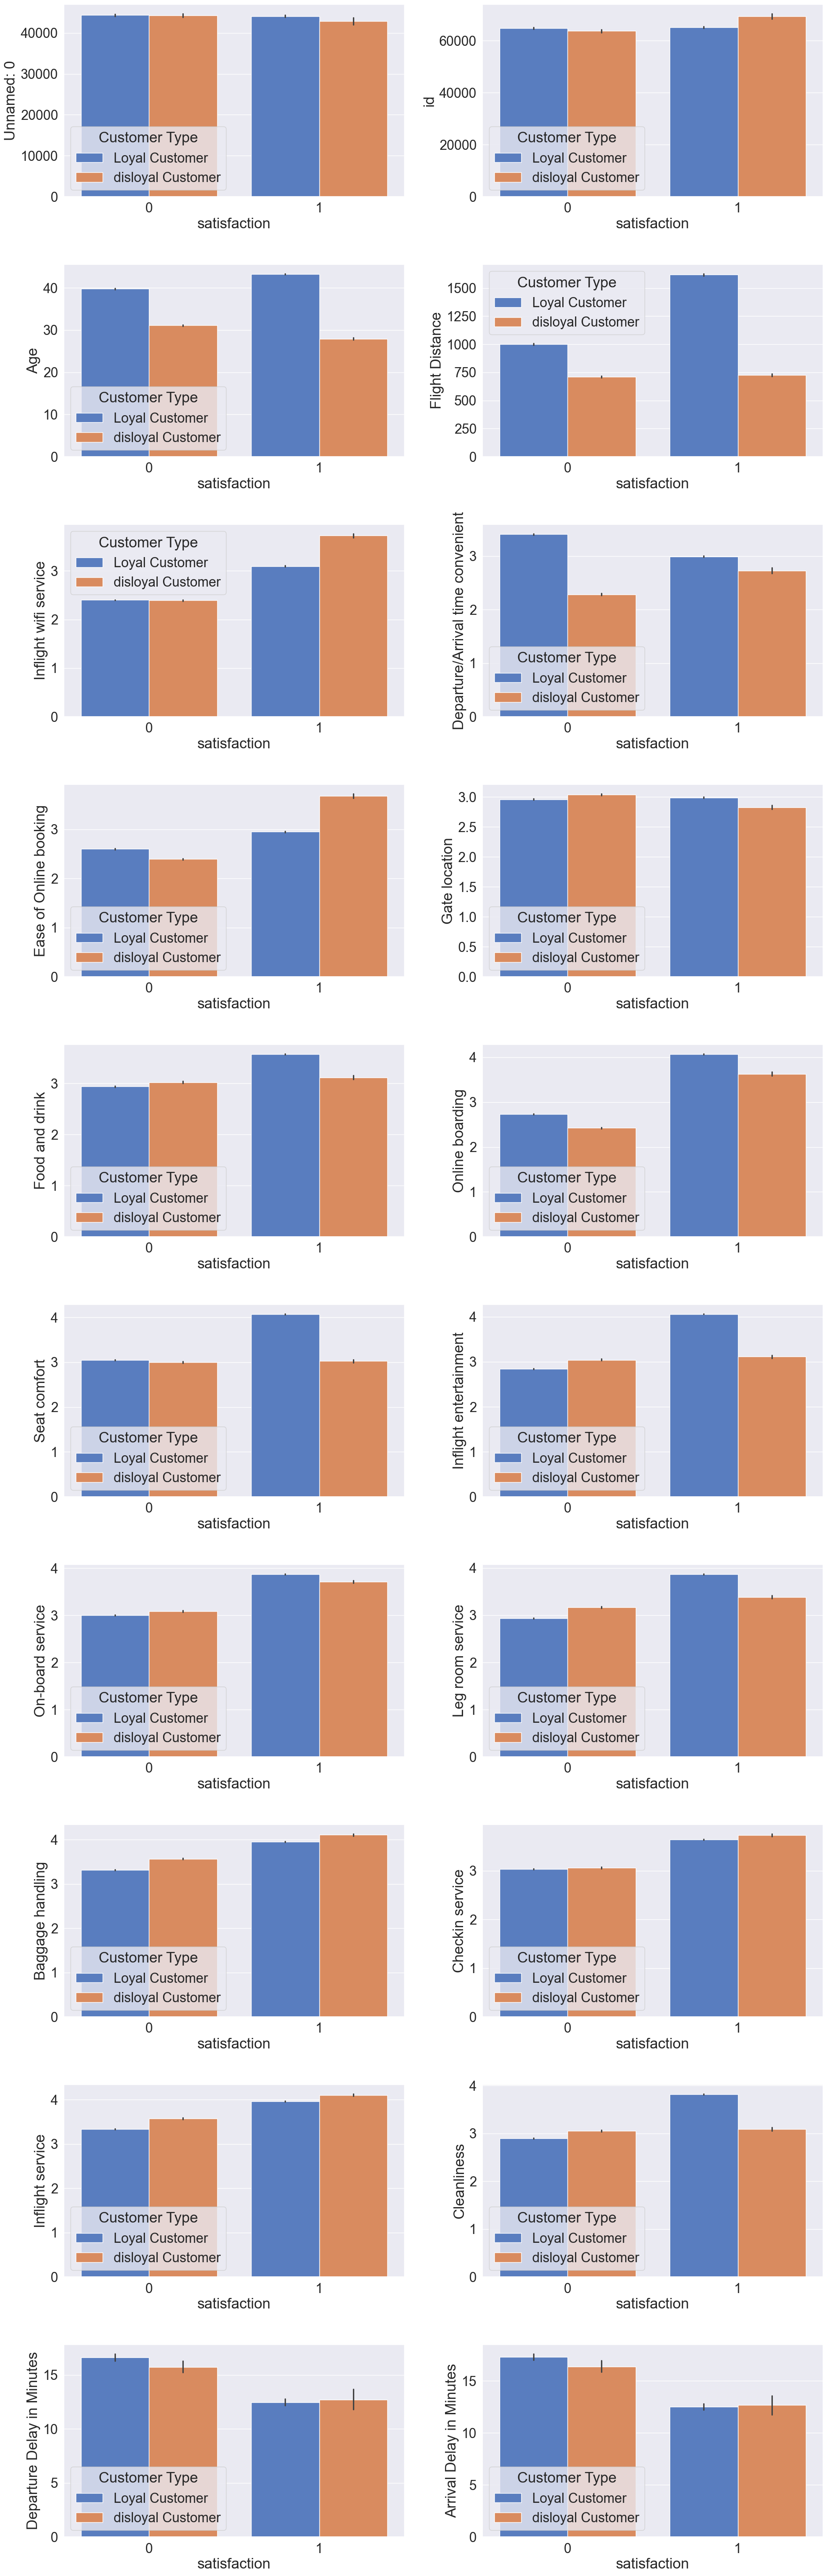

In [147]:
detail_barplot("Customer Type")

- For loyal customer:

    - Age around 40
    - Satisfy on high flight distance, seat comfort, inflight entertainment, airline service (ex. inflight, check-in, food and drinks), cleanliness


- For disloyal customer:

    - Age around 30
    - Satisfy on Inflight wifi service, ease of online booking
    
> Again, they generally feel neutral or dissatisfied when the delay time minutes is 12.5 or above.

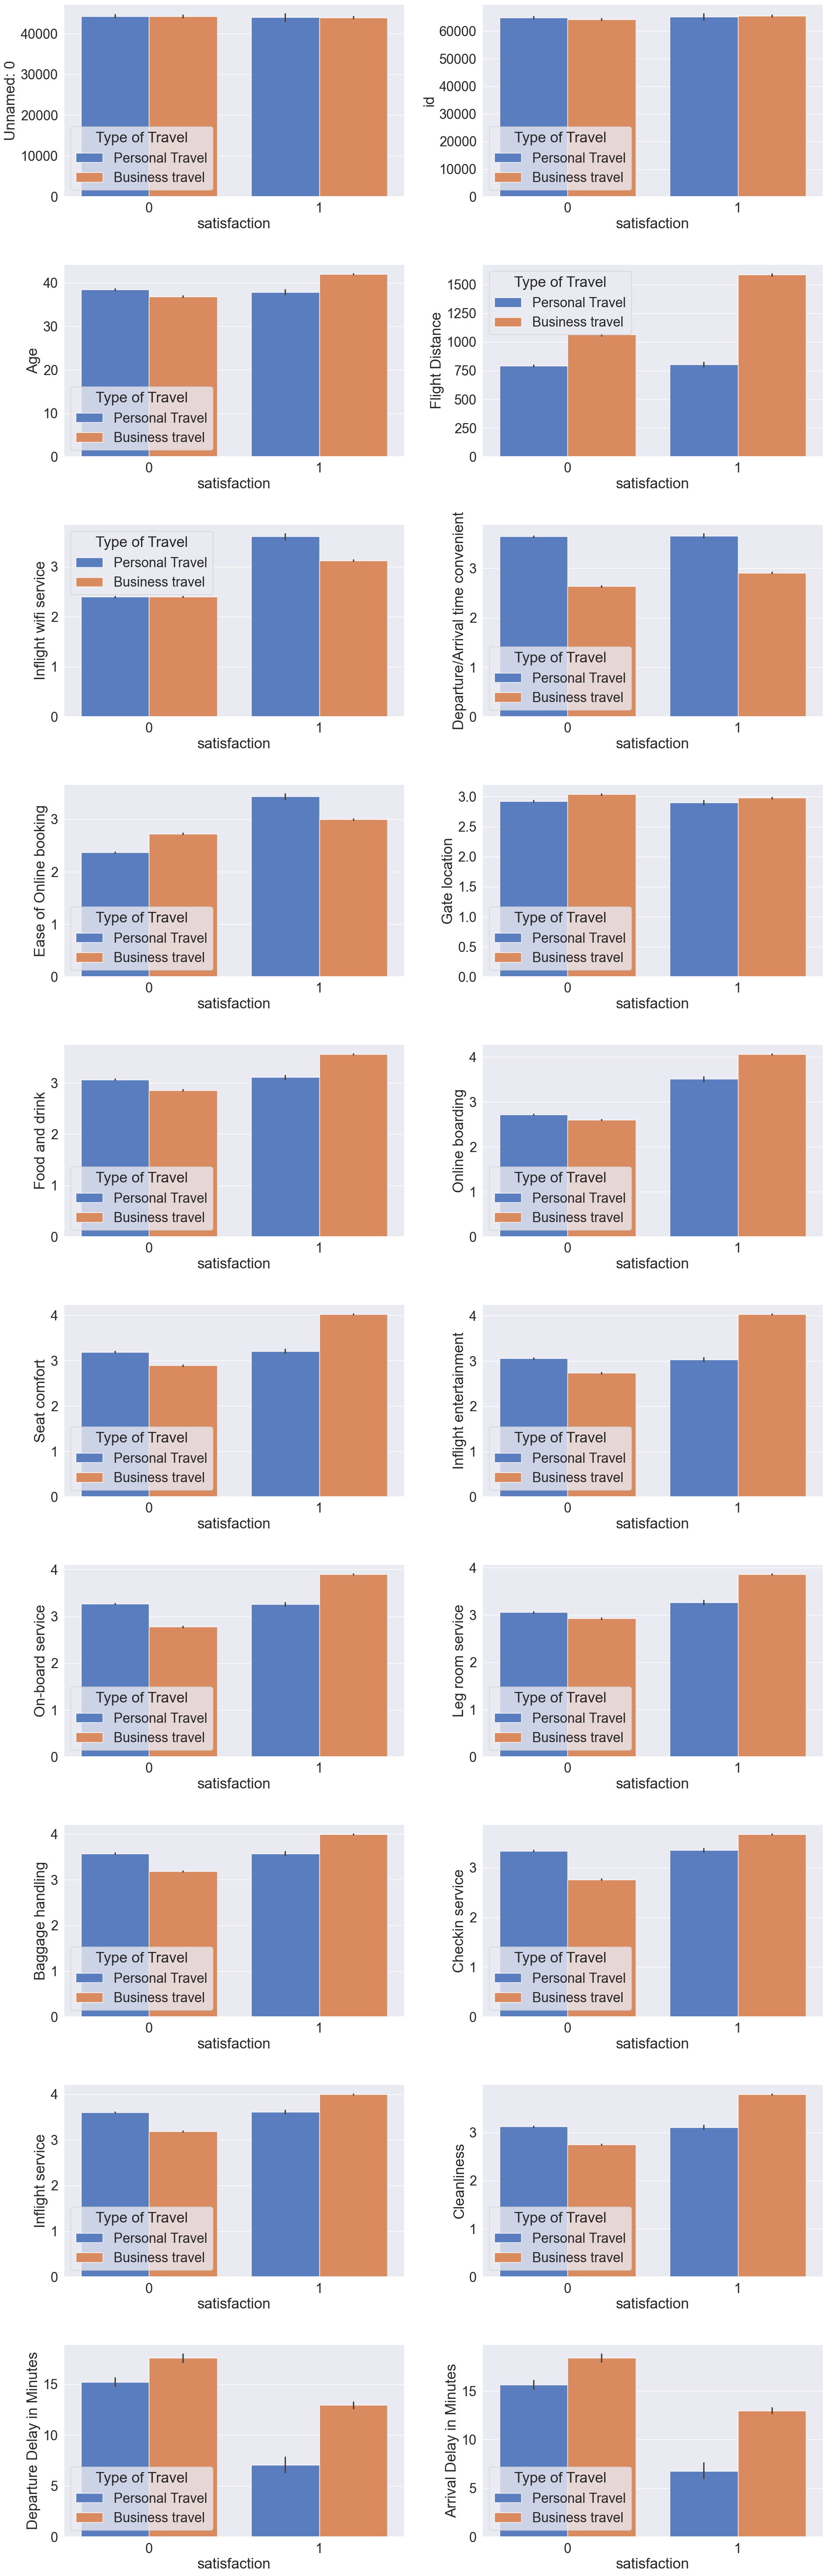

In [148]:
detail_barplot("Type of Travel")

- For personal travel:

    - Satisfy on inflight wifi services, ease of online booking
    - Average of delay time is 7.5 minutes for satisfied group

- For business travel:

    - Satisfy on flight distance, online boarding, seat comfort, inflight entertainment, on-board service, cleanliness

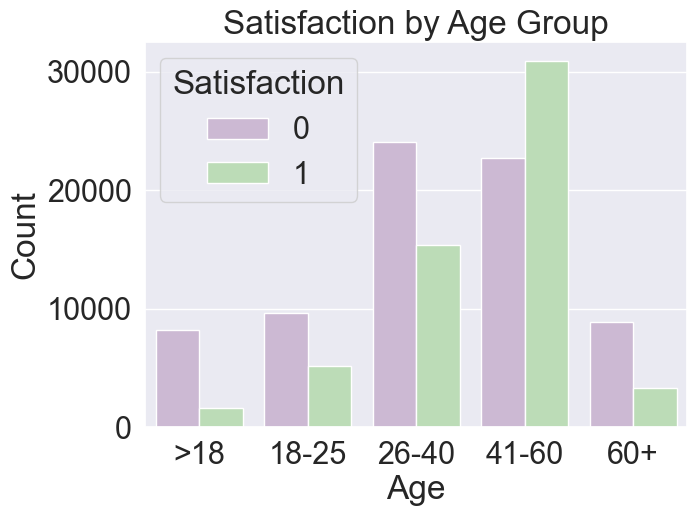

In [149]:
bins = [0, 18, 25, 40, 60, 90]
labels = ['>18', '18-25', '26-40', '41-60', '60+']
df_copy['Age Group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels, right=False)

# Create the countplot with custom colors
plt.figure(figsize=(7, 5))
sns.countplot(data=df_copy, x='Age Group', hue='satisfaction', palette='PRGn')
plt.title('Satisfaction by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

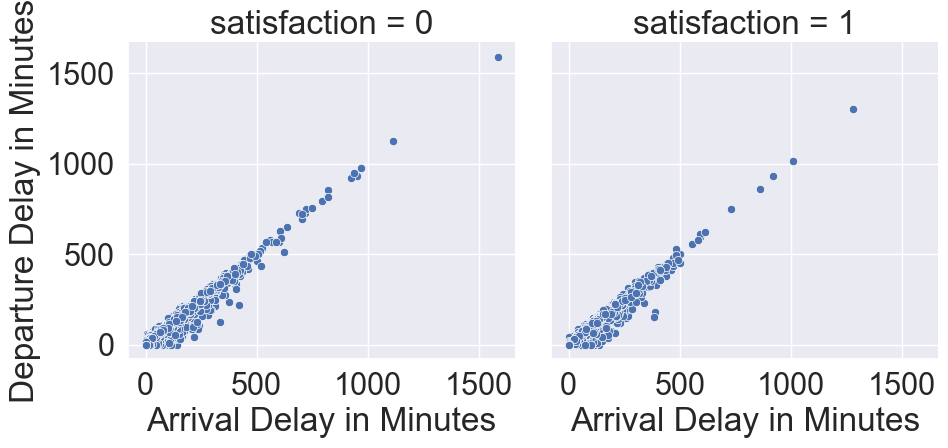

In [150]:
sns.relplot(data=df_copy,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',col='satisfaction')

### Correlation matrix

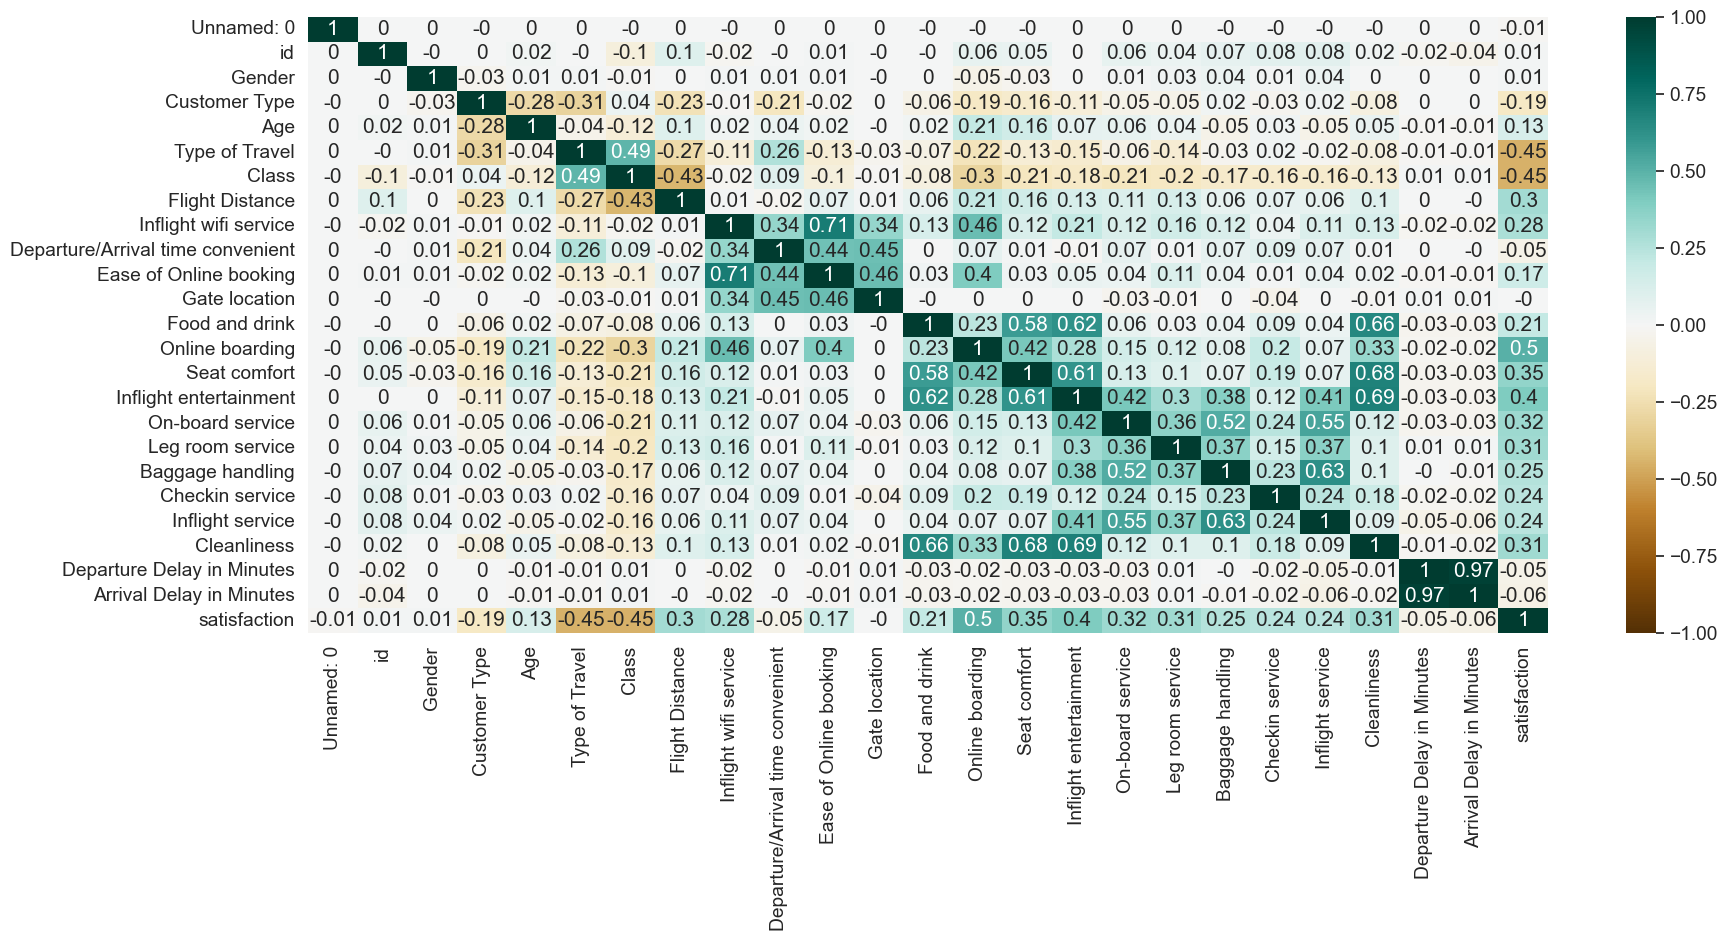

In [151]:
df_copy.drop("Age Group", axis=1, inplace=True)
for cat in train_cat_col:
    le = LabelEncoder()
    df_copy[cat] = le.fit_transform(df_copy[cat])

plt.figure(figsize=(20, 8))
sns.set(font_scale = 1.25)
ax = sns.heatmap(df_copy.corr().round(2),vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Conclusion

## What we need to do to our data?


### 1. Feature Extraction and Feature Selection 🚀

Create new features by combining scores into broader categories. 
Including 4 features, which are


First feature, we named it ***<mark>“Inflight Comfort & Quality”*** as the components with the highest loading scores are related to spending quality time inside the flight.
1) Cleanliness (0.854)
2) Food and drink (0.77)
3) Inflight entertainment (0.766)

Second feature, we named it ***<mark>“Customer Service Quality”*** as the components with the highest loading score are related to receiving quality service during the whole journey, from getting on the flight to arriving at the destination.
1) Inflight service (0.799)
2) Baggage handling (0.76)
3) On-board service (0.7)

Third feature, we named it ***<mark>“Convenience and Efficiency”*** as the components with the highest loading score are related to optimizing time efficiency throughout the entire journey.
1) Ease of online booking (0.766)
2) Gate location (0.68)
3) Inflight wifi service (0.605)

Fourth feature, we named it ***<mark>“Technological Accessibility”*** as the components with the highest loading score are related to the convenience of flight experience through ease of online access.
1) Online boarding (0.7565)
2) Inflight wifi service (0.478)
3) Ease of online booking (0.463)
    
Classify Overall Satisfaction: Convert the overall satisfaction score into a binary variable (Satisfied or Unsatisfied), where a score above a certain threshold (e.g., 3.5) is classified as satisfied.

And also about feature selection that we are goinf to pick the data that correlates to the target label.

### -------------------------------------------------------------------------------------------------------------

### 2. Data Transformation 💥

We need to clean our data by remove idness feature, deal with missing value and outliers and so on...

### -------------------------------------------------------------------------------------------------------------

## Data Cleansing

In [152]:
df_cleaned = df_copy.copy()

In [153]:
df_cleaned = df_cleaned.drop(['id'], axis=1)
df_cleaned

Unnamed: 0  Gender  Customer Type  Age  Type of Travel  Class  \
0                0       1              0   13               1      2   
1                1       1              1   25               0      0   
2                2       0              0   26               0      0   
3                3       0              0   25               0      0   
4                4       1              0   61               0      0   
...            ...     ...            ...  ...             ...    ...   
129875       25971       1              1   34               0      0   
129876       25972       1              0   23               0      0   
129877       25973       0              0   17               1      1   
129878       25974       1              0   14               0      0   
129879       25975       0              0   42               1      1   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
129875                                  3                       3  ...   
129876                                  4                       4  ...   
129877                                  5                       1  ...   
129878                                  3                       3  ...   
129879                                  5                       2  ...   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
129875                 4                4                 5            4   
129876                 5                5                 5            4   
129877                 4                5                 4            2   
129878                 5                

### Feature Extraction

In [154]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import numpy as np

Get just rating topics to do PCA for feature selection

In [155]:
df_pca = df_cleaned.copy()
df_pca = df_pca.iloc[:, 6:20]
df_pca

Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
129875              526                      3   
129876              646                      4   
129877              828                      2   
129878             1127                      3   
129879              264                      2   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
129875                                  3                       3   
129876                                  4                       4   
129877                                  5                       1   
129878                                  3                       3   
129879                                  5                       2   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
129875              1               4                3             4   
129876              4               4                4             4   
129877              5               2                1             2   
129878              3               4                4             4   
129879              5               4                2             2   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
129875                       4                 3                 2   
129876                       4                 4                 5   
129877                       2                 4                 3   
129878                       4                 3                 2   
129879                       1                 1                 2   

        Baggage handling  Checkin service  Inflight service  
0                      4                4                 5  
1                      3                1                 4  
2                      4                4                 4  
3                      3                1                 4  
4                      4                3                 3  
...                  ...              ...               ...  
129875                 4                4                 5  
129876                 5                5                 5  
129877                 4                5                 4  
129878                 5                4                 5  
129879                 1                1                 1  

[129880 rows x 14 columns]

In [156]:
check_na = df_pca.isna().sum().to_frame().reset_index()
check_na

index  0
0                     Flight Distance  0
1               Inflight wifi service  0
2   Departure/Arrival time convenient  0
3              Ease of Online booking  0
4                       Gate location  0
5                      Food and drink  0
6                     Online boarding  0
7                        Seat comfort  0
8              Inflight entertainment  0
9                    On-board service  0
10                   Leg room service  0
11                   Baggage handling  0
12                    Checkin service  0
13                   Inflight service  0

Firstly, do the standardization

In [157]:
# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_pca)

In [158]:
# PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [159]:
# Check Eigen Score
eigen_values = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_ratio = variance_ratio.cumsum()

In [160]:
# To DataFrame
pca_results = pd.DataFrame({
    'eigenvalue': eigen_values,
    'percentage of variance': variance_ratio,
    'cumulative percentage of variance': cumulative_ratio
})
pca_results.index = ['comp ' + str(i+1) for i in pca_results.index]

In [161]:
pca_results

eigenvalue  percentage of variance  cumulative percentage of variance
comp 1     3.472974               24.806763                          24.806763
comp 2     2.335502               16.682026                          41.488789
comp 3     1.880383               13.431203                          54.919992
comp 4     1.118213                7.987173                          62.907166
comp 5     0.948404                6.774264                          69.681429
comp 6     0.912274                6.516194                          76.197624
comp 7     0.689214                4.922917                          81.120541
comp 8     0.536838                3.834525                          84.955066
comp 9     0.493968                3.528315                          88.483381
comp 10    0.461174                3.294077                          91.777458
comp 11    0.367939                2.628116                          94.405574
comp 12    0.317076                2.264810                          96.670383
comp 13    0.255242                1.823141                          98.493525
comp 14    0.210908                1.506475                         100.000000

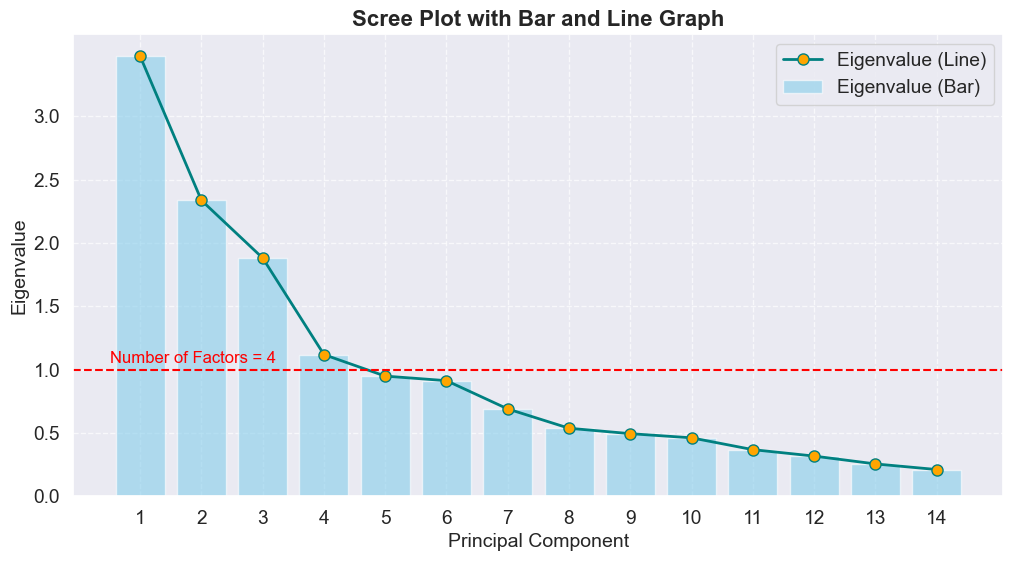

In [162]:
# Visualize the result
plt.figure(figsize=(12,6))
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, alpha=0.6, color='skyblue', label='Eigenvalue (Bar)')
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', linewidth=2, color='teal', markerfacecolor='orange', markersize=8, label='Eigenvalue (Line)')
plt.title('Scree Plot with Bar and Line Graph', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Eigenvalue', fontsize=14)
plt.axhline(y=1, color='red', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(pca.explained_variance_) + 1))
plt.yticks(np.arange(0, max(pca.explained_variance_), step=0.5))
plt.legend()

n_factors = np.sum(pca.explained_variance_ >= 1)
plt.text(0.5, 1.05, f'Number of Factors = {n_factors}', color = 'red', fontsize=12)

plt.show()

In [163]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(data_scaled)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [164]:
loadings_df = pd.DataFrame(fa.loadings_, index=df_pca.columns, columns=[f'Factor{i+1}' for i in range(4)])
loadings_df

Factor1   Factor2   Factor3   Factor4
Flight Distance                    0.100697 -0.017636  0.084422  0.209582
Inflight wifi service              0.108362  0.679913  0.087365  0.340300
Departure/Arrival time convenient  0.061676  0.577982 -0.009892 -0.063589
Ease of Online booking             0.011226  0.836544 -0.040263  0.310236
Gate location                     -0.033264  0.630783  0.025143 -0.150432
Food and drink                    -0.008816  0.028909  0.777476  0.084775
Online boarding                    0.070962  0.194014  0.211526  0.859117
Seat comfort                       0.063286 -0.012488  0.714305  0.293126
Inflight entertainment             0.457271  0.036956  0.783879  0.099971
On-board service                   0.696514  0.014419  0.090111  0.097566
Leg room service                   0.480831  0.054361  0.056585  0.119974
Baggage handling                   0.764467  0.041492  0.040650  0.008208
Checkin service                    0.283285 -0.014486  0.072470  0.176515
Inflight service                   0.798559  0.038589  0.046419 -0.011790

In [165]:
# Iterate over each factor and get the top 3 highest values
for factor in loadings_df.columns:
    # Create an empty DataFrame to store the results
    top3_df = pd.DataFrame()
    top3_df[factor] = loadings_df[factor].nlargest(3)
    # Print the result
    print(top3_df, "\n")

                   Factor1
Inflight service  0.798559
Baggage handling  0.764467
On-board service  0.696514 

                         Factor2
Ease of Online booking  0.836544
Inflight wifi service   0.679913
Gate location           0.630783 

                         Factor3
Inflight entertainment  0.783879
Food and drink          0.777476
Seat comfort            0.714305 

                         Factor4
Online boarding         0.859117
Inflight wifi service   0.340300
Ease of Online booking  0.310236 



Create new features by combining scores into broader categories. 
Including 4 features, which are


First feature, we named it ***<mark>“Inflight Comfort & Quality”*** as the components with the highest loading scores are related to spending quality time inside the flight.
1) Cleanliness (0.854)
2) Food and drink (0.77)
3) Inflight entertainment (0.766)

Second feature, we named it ***<mark>“Customer Service Quality”*** as the components with the highest loading score are related to receiving quality service during the whole journey, from getting on the flight to arriving at the destination.
1) Inflight service (0.799)
2) Baggage handling (0.76)
3) On-board service (0.7)

Third feature, we named it ***<mark>“Convenience and Efficiency”*** as the components with the highest loading score are related to optimizing time efficiency throughout the entire journey.
1) Ease of online booking (0.766)
2) Gate location (0.68)
3) Inflight wifi service (0.605)

Fourth feature, we named it ***<mark>“Technological Accessibility”*** as the components with the highest loading score are related to the convenience of flight experience through ease of online access.
1) Online boarding (0.7565)
2) Inflight wifi service (0.478)
3) Ease of online booking (0.463)

In [166]:
scores = fa.transform(df_pca)
print(scores)
df_pca['Inflight Comfort and Quality'] = scores[:, 0]
df_pca['Customer Service Quality'] = scores[:, 1]
df_pca['Convenience and Efficiency'] = scores[:, 2]
df_pca['Technological Accessibility'] = scores[:, 3]

[[ 13.15252232  -7.55203105   2.36470056  14.48183607]
 [  7.46152201  -2.47117486  -0.97546402   8.73400094]
 [ 25.74945276 -24.1011522   -0.20345723  35.42684536]
 ...
 [ 19.95200546 -15.95174351  -1.83814862  22.88596344]
 [ 25.81992968 -22.43745659  -1.29385477  33.99908596]
 [  5.62342608  -2.72964495   0.9922159    7.94145441]]


In [167]:
df_pca.shape

(129880, 18)

In [168]:
# Merge data and drop duplicates
df_merged = pd.merge(df_cleaned, df_pca, suffixes=('_main', '_new'), how="inner").drop_duplicates()
df_merged

Unnamed: 0  Gender  Customer Type  Age  Type of Travel  Class  \
0                0       1              0   13               1      2   
1                1       1              1   25               0      0   
2                2       0              0   26               0      0   
3                3       0              0   25               0      0   
4                4       1              0   61               0      0   
...            ...     ...            ...  ...             ...    ...   
130201       25971       1              1   34               0      0   
130202       25972       1              0   23               0      0   
130203       25973       0              0   17               1      1   
130204       25974       1              0   14               0      0   
130205       25975       0              0   42               1      1   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
130201              526                      3   
130202              646                      4   
130203              828                      2   
130204             1127                      3   
130205              264                      2   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
130201                                  3                       3  ...   
130202                                  4                       4  ...   
130203                                  5                       1  ...   
130204                                  3                       3  ...   
130205                                  5                       2  ...   

        Checkin service  Inflight service  Cleanliness  \
0                     4                 5            5   
1                     1                 4            1   
2                     4                 4            5   
3                     1                 4            2   
4                     3                 3            3   
...                 ...               ...          ...   
130201                4                 5            4   
130202                5                 5            4   
130203                5                 4            2   
130204                4                 5            4   
130205                1                 1            1   

        Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                               25                      18.0             0   
1                                1                       6.0             0   
2                                0                       0.0             1   
3                               11                       9.0             0   
4                                0                       0.0             1   
...                            ...                       ...           ...   
130201                           0                       0.0             0   
130202                           0                       0.0             1   
130203                           0                       0.0             0   
130204                           0                       0.0             1   
130205                           0                       0.0             0   

       

In [169]:
dropped_cols = ['Unnamed: 0','Cleanliness', 'Food and drink', 'Inflight entertainment', 'Inflight service', 'Baggage handling', 'On-board service', 'Ease of Online booking', 'Gate location', 'Inflight wifi service', 'Online boarding']
df_merged.drop(dropped_cols, axis=1, inplace=True)

df_merged


Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0            1              0   13               1      2              460   
1            1              1   25               0      0              235   
2            0              0   26               0      0             1142   
3            0              0   25               0      0              562   
4            1              0   61               0      0              214   
...        ...            ...  ...             ...    ...              ...   
130201       1              1   34               0      0              526   
130202       1              0   23               0      0              646   
130203       0              0   17               1      1              828   
130204       1              0   14               0      0             1127   
130205       0              0   42               1      1              264   

        Departure/Arrival time convenient  Seat comfort  Leg room service  \
0                                       4             5                 3   
1                                       2             1                 5   
2                                       2             5                 3   
3                                       5             2                 5   
4                                       3             5                 4   
...                                   ...           ...               ...   
130201                                  3             4                 2   
130202                                  4             4                 5   
130203                                  5             2                 3   
130204                                  3             4                 2   
130205                                  5             2                 2   

        Checkin service  Departure Delay in Minutes  Arrival Delay in Minutes  \
0                     4                          25                      18.0   
1                     1                           1                       6.0   
2                     4                           0                       0.0   
3                     1                          11                       9.0   
4                     3                           0                       0.0   
...                 ...                         ...                       ...   
130201                4                           0                       0.0   
130202                5                           0                       0.0   
130203                5                           0                       0.0   
130204                4                           0                       0.0   
130205                1                           0                       0.0   

        satisfaction  Inflight Comfort and Quality  Customer Service Quality  \
0                  0                     13.152522                 -7.552031   
1                  0                      7.461522                 -2.471175   
2                  1                     25.749453                -24.101152   
3                  0                     13.923610                 -7.784265   
4                  1                      7.144911                 -2.071905   
...              ...                           ...                       ...   
130201             0                     14.079389                 -9.193673   
130202             1                     17.165364                -10.510695   
130203             0                     19.952005                -15.951744   
130204             1                     25.819930                -22.437457   
130205             0                      5.623426                 -2.729645   

        Convenience and Efficiency  Technological Accessibility  
0                         2.364701                    14.481836  
1                        -0.975464                     8.734001  
2             

In [170]:
df_merged.drop(["Class", "Arrival Delay in Minutes", "Departure/Arrival time convenient"], axis=1, inplace=True)
df_merged

Gender  Customer Type  Age  Type of Travel  Flight Distance  \
0            1              0   13               1              460   
1            1              1   25               0              235   
2            0              0   26               0             1142   
3            0              0   25               0              562   
4            1              0   61               0              214   
...        ...            ...  ...             ...              ...   
130201       1              1   34               0              526   
130202       1              0   23               0              646   
130203       0              0   17               1              828   
130204       1              0   14               0             1127   
130205       0              0   42               1              264   

        Seat comfort  Leg room service  Checkin service  \
0                  5                 3                4   
1                  1                 5                1   
2                  5                 3                4   
3                  2                 5                1   
4                  5                 4                3   
...              ...               ...              ...   
130201             4                 2                4   
130202             4                 5                5   
130203             2                 3                5   
130204             4                 2                4   
130205             2                 2                1   

        Departure Delay in Minutes  satisfaction  \
0                               25             0   
1                                1             0   
2                                0             1   
3                               11             0   
4                                0             1   
...                            ...           ...   
130201                           0             0   
130202                           0             1   
130203                           0             0   
130204                           0             1   
130205                           0             0   

        Inflight Comfort and Quality  Customer Service Quality  \
0                          13.152522                 -7.552031   
1                           7.461522                 -2.471175   
2                          25.749453                -24.101152   
3                          13.923610                 -7.784265   
4                           7.144911                 -2.071905   
...                              ...                       ...   
130201                     14.079389                 -9.193673   
130202                     17.165364                -10.510695   
130203                     19.952005                -15.951744   
130204                     25.819930                -22.437457   
130205                      5.623426                 -2.729645   

        Convenience and Efficiency  Technological Accessibility  
0                         2.364701                    14.481836  
1                        -0.975464                     8.734001  
2                        -0.203457                    35.426845  
3                        -1.042930                    16.504037  
4                         1.968757                     9.531769  
...                            ...                          ...  
130201                    1.071334                    16.511588  
130202                    0.352504                    20.496387  
130203                   -1.838149                    22.885963  
130204                   -1.293855                    33.999086  
130205                    0.992216                     7.941454  

[129880 rows x 14 columns]

Do dummies

In [171]:
df_dummies = pd.get_dummies(df_merged, columns=['Gender', 'Customer Type', 'Type of Travel']).astype(int)
df_dummies = df_dummies.rename(columns={'Gender_0': 'Female', 'Gender_1': 'Male', 'Type of Travel_0':'Business','Type of Travel_1':'Personal','Customer Type_0':'Loyal','Customer Type_1':'Disloyal'})

df_dummies


Age  Flight Distance  Seat comfort  Leg room service  Checkin service  \
0        13              460             5                 3                4   
1        25              235             1                 5                1   
2        26             1142             5                 3                4   
3        25              562             2                 5                1   
4        61              214             5                 4                3   
...     ...              ...           ...               ...              ...   
130201   34              526             4                 2                4   
130202   23              646             4                 5                5   
130203   17              828             2                 3                5   
130204   14             1127             4                 2                4   
130205   42              264             2                 2                1   

        Departure Delay in Minutes  satisfaction  \
0                               25             0   
1                                1             0   
2                                0             1   
3                               11             0   
4                                0             1   
...                            ...           ...   
130201                           0             0   
130202                           0             1   
130203                           0             0   
130204                           0             1   
130205                           0             0   

        Inflight Comfort and Quality  Customer Service Quality  \
0                                 13                        -7   
1                                  7                        -2   
2                                 25                       -24   
3                                 13                        -7   
4                                  7                        -2   
...                              ...                       ...   
130201                            14                        -9   
130202                            17                       -10   
130203                            19                       -15   
130204                            25                       -22   
130205                             5                        -2   

        Convenience and Efficiency  Technological Accessibility  Female  Male  \
0                                2                           14       0     1   
1                                0                            8       0     1   
2                                0                           35       1     0   
3                               -1                           16       1     0   
4                                1                            9       0     1   
...                            ...                          ...     ...   ...   
130201                           1                           16       0     1   
130202                           0                           20       0     1   
130203                          -1                           22       1     0   
130204                          -1                           33       0     1   
130205                           0                            7       1     0   

        Loyal  Disloyal  Business  Personal  
0           1         0         0         1  
1           0         1         1         0  
2           1         0         1         0  
3           1         0         1         0  
4           1         0         1         0  
...       ...       ...       ...       ...  
130201      0         1         1         0  
130202      1         0         1         0  
130203      1         0         0         1  
130204      1         0         1         0  
130205      1         0         0         1  

[129880 rows x 17 columns]

In [172]:
# Reassign the column order
column_to_move = 'satisfaction'
cols = [col for col in df_dummies.columns if col != column_to_move]
df_dummies = df_dummies[cols + [column_to_move]]
df_dummies

Age  Flight Distance  Seat comfort  Leg room service  Checkin service  \
0        13              460             5                 3                4   
1        25              235             1                 5                1   
2        26             1142             5                 3                4   
3        25              562             2                 5                1   
4        61              214             5                 4                3   
...     ...              ...           ...               ...              ...   
130201   34              526             4                 2                4   
130202   23              646             4                 5                5   
130203   17              828             2                 3                5   
130204   14             1127             4                 2                4   
130205   42              264             2                 2                1   

        Departure Delay in Minutes  Inflight Comfort and Quality  \
0                               25                            13   
1                                1                             7   
2                                0                            25   
3                               11                            13   
4                                0                             7   
...                            ...                           ...   
130201                           0                            14   
130202                           0                            17   
130203                           0                            19   
130204                           0                            25   
130205                           0                             5   

        Customer Service Quality  Convenience and Efficiency  \
0                             -7                           2   
1                             -2                           0   
2                            -24                           0   
3                             -7                          -1   
4                             -2                           1   
...                          ...                         ...   
130201                        -9                           1   
130202                       -10                           0   
130203                       -15                          -1   
130204                       -22                          -1   
130205                        -2                           0   

        Technological Accessibility  Female  Male  Loyal  Disloyal  Business  \
0                                14       0     1      1         0         0   
1                                 8       0     1      0         1         1   
2                                35       1     0      1         0         1   
3                                16       1     0      1         0         1   
4                                 9       0     1      1         0         1   
...                             ...     ...   ...    ...       ...       ...   
130201                           16       0     1      0         1         1   
130202                           20       0     1      1         0         1   
130203                           22       1     0      1         0         0   
130204                           33       0     1      1         0         1   
130205                            7       1     0      1         0         0   

        Personal  satisfaction  
0              1             0  
1              0             0  
2              0             1  
3              0             0  
4              0             1  
...          ...           ...  
130201         0             0  
130202         0             1  
130203         1             0  
130204         0             1  
130205         1             0  

[129880 rows x 17 columns]

Now do a standardization

In [173]:
# Assuming 'target_column' is the name of your target column
target_column = 'satisfaction'
features = df_dummies.drop(columns=[target_column])
target = df_dummies[target_column]

# Initialize and fit the scaler
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the scaled features with the target column
df_transformed = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

df_transformed


Age  Flight Distance  Seat comfort  Leg room service  \
0      -1.747961        -0.732184      1.181428         -0.266574   
1      -0.954274        -0.957760     -1.850520          1.252898   
2      -0.888133        -0.048440      1.181428         -0.266574   
3      -0.954274        -0.629924     -1.092533          1.252898   
4       1.426788        -0.978814      1.181428          0.493162   
...          ...              ...           ...               ...   
129875 -0.359008        -0.666016      0.423441         -1.026310   
129876 -1.086555        -0.545709      0.423441          1.252898   
129877 -1.483399        -0.363243     -1.092533         -0.266574   
129878 -1.681821        -0.063478      0.423441         -1.026310   
129879  0.170117        -0.928686     -1.092533         -1.026310   

        Checkin service  Departure Delay in Minutes  \
0              0.547894                    0.270187   
1             -1.821437                   -0.360214   
2              0.547894                   -0.386481   
3             -1.821437                   -0.097547   
4             -0.241883                   -0.386481   
...                 ...                         ...   
129875         0.547894                   -0.386481   
129876         1.337671                   -0.386481   
129877         1.337671                   -0.386481   
129878         0.547894                   -0.386481   
129879        -1.821437                   -0.386481   

        Inflight Comfort and Quality  Customer Service Quality  \
0                          -0.667868                  0.735552   
1                          -0.979633                  0.957842   
2                          -0.044337                 -0.020234   
3                          -0.667868                  0.735552   
4                          -0.979633                  0.957842   
...                              ...                       ...   
129875                     -0.615907                  0.646636   
129876                     -0.460024                  0.602178   
129877                     -0.356103                  0.379888   
129878                     -0.044337                  0.068682   
129879                     -1.083555                  0.957842   

        Convenience and Efficiency  Technological Accessibility    Female  \
0                         1.096109                    -0.736656 -1.014878   
1                         0.538075                    -0.948148 -1.014878   
2                         0.538075                     0.003567  0.985340   
3                         0.259058                    -0.666158  0.985340   
4                         0.817092                    -0.912900 -1.014878   
...                            ...                          ...       ...   
129875                    0.817092                    -0.666158 -1.014878   
129876                    0.538075                    -0.525163 -1.014878   
129877                    0.259058                    -0.454666  0.985340   
129878                    0.259058                    -0.066930 -1.014878   
129879                    0.538075                    -0.983397  0.985340   

            Male     Loyal  Disloyal  Business  Personal  satisfaction  
0       1.014878  0.473422 -0.473422 -1.493951  1.493951             0  
1       1.014878 -2.112281  2.112281  0.669366 -0.669366             0  
2      -0.985340  0.473422 -0.473422  0.669366 -0.669366             1  
3      -0.985340  0.473422 -0.473422  0.669366 -0.669366             0  
4       1.014878  0.473422 -0.473422  0.669366 -0.669366             1  
...          ...       ...       ...       ...       ...           ...  
129875  1.014878 -2.112281  2.112281  0.669366 -0.669366             0  
129876  1.014878  0.473422 -0.473422  0.669366 -0.669366             1  
129877 -0.985340  0.473422 -0.473422 -1.493951  1.493951             0  
129878  1.014878  0.473422 -0.473422  0.669366 -0.669366             1  
12

In [174]:
df_transformed.to_csv('../datasets/train_transformed.csv', index=False)